In [1]:
# Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Step 2: Load the data
df = pd.read_csv('data.csv', delimiter=';')

In [3]:
# Display the first few rows to verify
df.head()

,v,d,S,r,p
0,4,0.052,19.155,0,1.103
1,8,0.047,24.478,0,1.271
2,12,0.100,38.443,0,1.210
3,24,0.055,25.420,0,1.564
4,4,0.078,27.716,1,0.962


In [4]:
# Step 3: Select input features and target
features = ['v', 'd', 'S', 'r']
target = 'p'  

X = df[features].values
y = df[target].values

In [5]:
# Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [6]:

# Step 5: Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
# Step 6: Define the neural network
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1)  # Use activation='sigmoid' for binary classification
])



/opt/anaconda3/envs/neural_networks/lib/python3.13/site-packages/keras/src/layers/core/dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

# Step 7: Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
# Use 'binary_crossentropy' or 'categorical_crossentropy' for classification

In [9]:
# Step 8: Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=16)


Epoch 1/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 2s 467us/step - loss: 0.0205 - mae: 0.0848 - val_loss: 0.0059 - val_mae: 0.0639
Epoch 2/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - loss: 0.0060 - mae: 0.0639 - val_loss: 0.0059 - val_mae: 0.0639
Epoch 3/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - loss: 0.0059 - mae: 0.0635 - val_loss: 0.0059 - val_mae: 0.0637
Epoch 4/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 474us/step - loss: 0.0058 - mae: 0.0630 - val_loss: 0.0057 - val_mae: 0.0628
Epoch 5/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 457us/step - loss: 0.0057 - mae: 0.0627 - val_loss: 0.0055 - val_mae: 0.0622
Epoch 6/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - loss: 0.0057 - mae: 0.0628 - val_loss: 0.0058 - val_mae: 0.0633
Epoch 7/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - loss: 0.0057 - mae: 0.0624 - val_loss: 0.0056 - val_mae: 0.0625
Epoch 8/50
2600/2600 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - loss: 0.0056 - mae: 0.0623 - val_loss: 0.0056 - val_mae: 0.0625
Epoch 9/50
2600/2600 ━━━

In [10]:
# Step 9: Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f'Test MAE: {mae}')


407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 329us/step - loss: 0.0053 - mae: 0.0607
Test MAE: 0.060720112174749374


In [11]:
import matplotlib.pyplot as plt

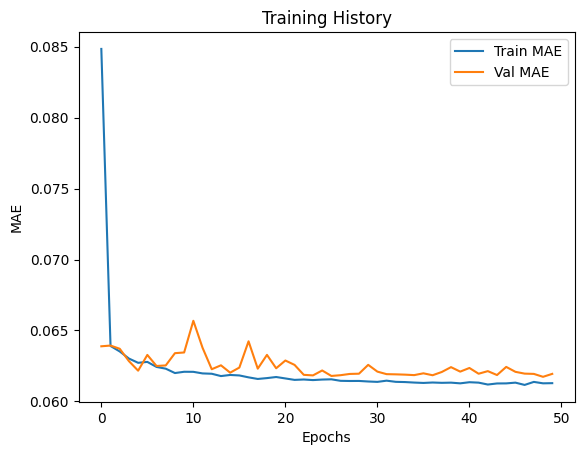

In [12]:


plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.title('Training History')
plt.show()


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of features to plot
features_to_plot = ['S', 'r', 'v', 'd']
target = 'p'  # Replace with your actual target column name

# Set plot style
sns.set(style="whitegrid")

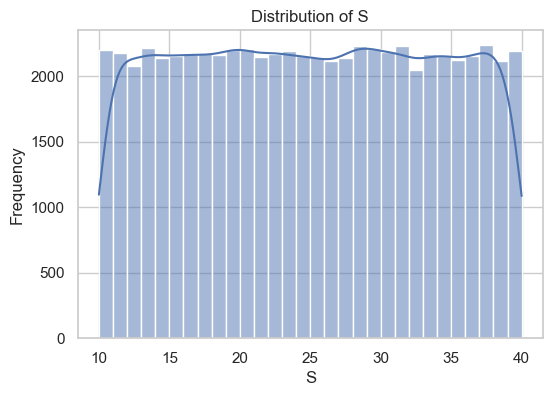

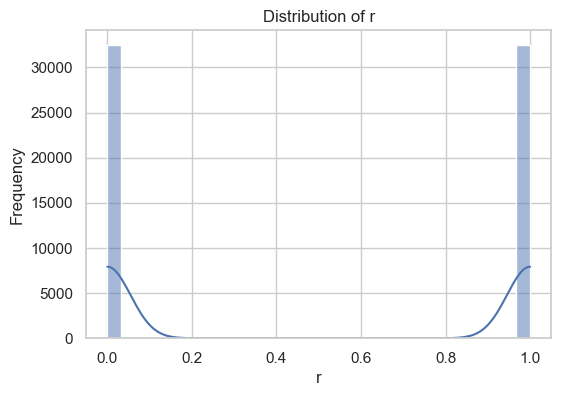

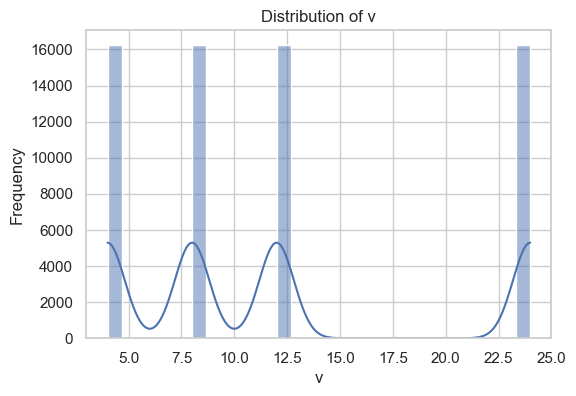

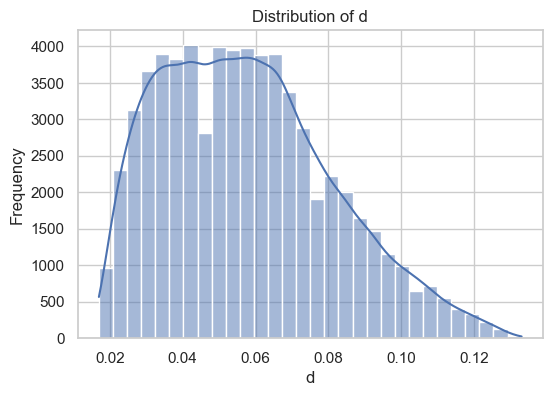

In [15]:
# Plot histograms
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()


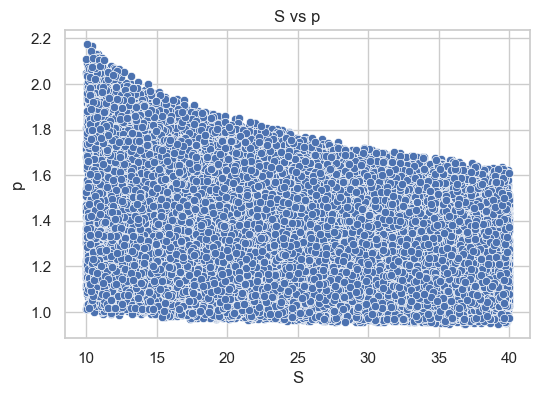

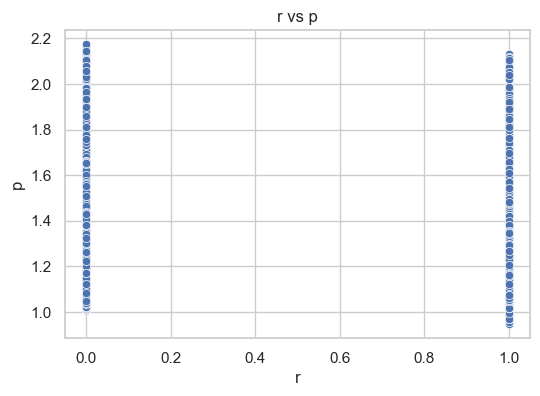

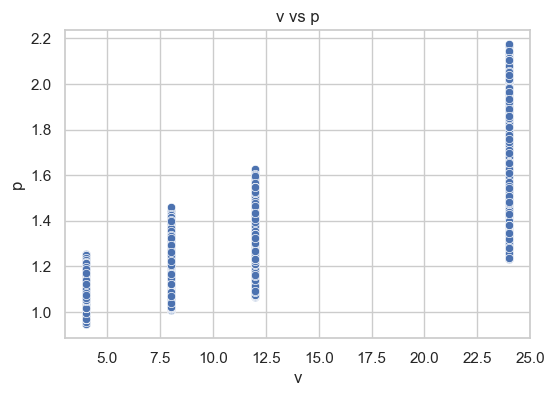

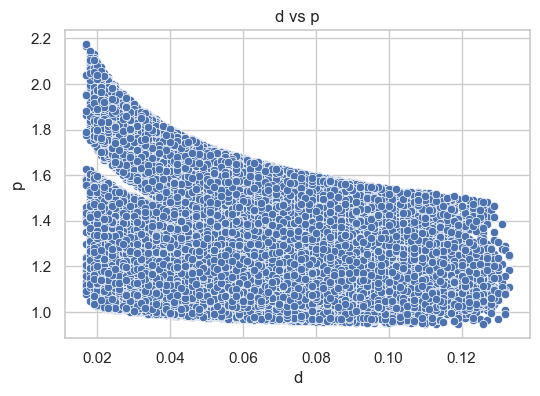

In [16]:
# Plot scatter plots of each feature vs target
for feature in features_to_plot:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=df[feature], y=df[target])
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()


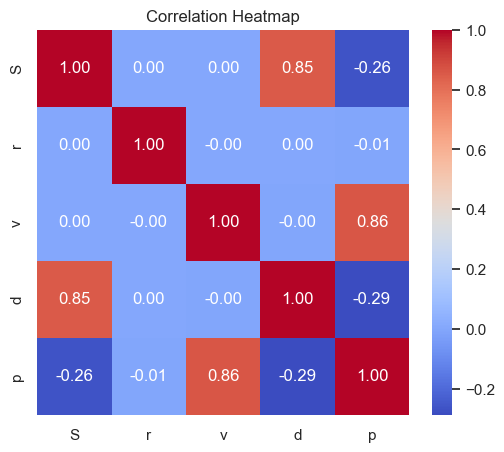

In [17]:
# Correlation heatmap between selected features and target
plt.figure(figsize=(6, 5))
sns.heatmap(df[features_to_plot + [target]].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

407/407 ━━━━━━━━━━━━━━━━━━━━ 0s 268us/step


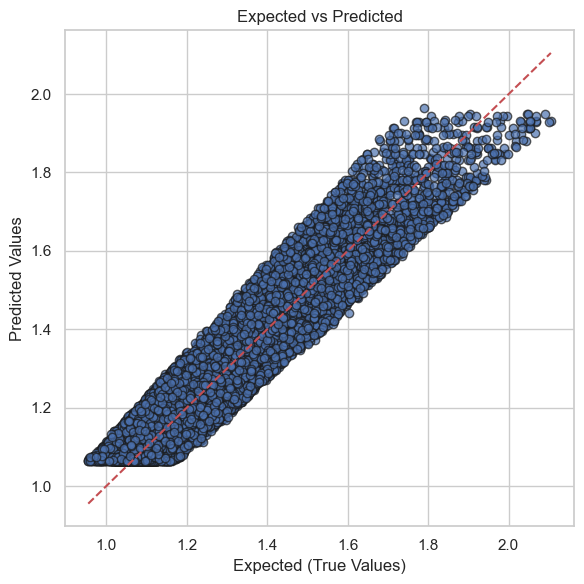

In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Make predictions
y_pred = model.predict(X_test).flatten()  # flatten in case it's 2D

# Step 2: Plot expected vs predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # 45-degree line
plt.xlabel('Expected (True Values)')
plt.ylabel('Predicted Values')
plt.title('Expected vs Predicted')
plt.grid(True)
plt.tight_layout()
plt.show()